<a href="https://colab.research.google.com/github/farid-hamid/FinalYearProjectFH/blob/main/Text_Corpus_EDA_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Initial Text Cleaning & Corpus EDA** 🧹🔍
*This notebook demonstrates the initial cleaning and natural language processing of the text corpus, as well as some exploration of the unstructured dataset through document length distributions (with upcoming Topic modelling in mind) and word cloud visualisations to understand popular discussion and narrative terms.*

# **Initial Library Imports for NLP**

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
import re
import string
import nltk
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from string import digits

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/scraped_diabetes_discussion_data.xlsx')
df.info()
df.isna().count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subReddit            1000 non-null   object 
 1   Date of Post         1000 non-null   object 
 2   Title                995 non-null    object 
 3   Body Text            941 non-null    object 
 4   Top Comment          941 non-null    object 
 5   Top Comment Reply 1  551 non-null    object 
 6   Top Comment Reply 2  128 non-null    object 
 7   Top Comment Reply 3  38 non-null     object 
 8   Top Comment Reply 4  18 non-null     object 
 9   Top Comment Reply 5  0 non-null      float64
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


subReddit              1000
Date of Post           1000
Title                  1000
Body Text              1000
Top Comment            1000
Top Comment Reply 1    1000
Top Comment Reply 2    1000
Top Comment Reply 3    1000
Top Comment Reply 4    1000
Top Comment Reply 5    1000
dtype: int64

In [4]:
df.fillna('',inplace=True)

In [ ]:
#RAW_EDA = ['subReddit','Title','Body Text','Top Comment', 'Top Comment Reply 1']

# **Initial Text Cleaning**
Creating a 'Discussion' column, defining text cleaning functions and applying them to the documents in the corpus.

In [5]:
#df_EDA = df[RAW_EDA].copy()
df['Discussion']=df.apply(lambda row: ' '.join(row[['Title', 'Body Text', 'Top Comment']].values), axis=1)
df['Raw Discussion']=df.apply(lambda row: ' '.join(row[['Title', 'Body Text', 'Top Comment']].values), axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subReddit            1000 non-null   object
 1   Date of Post         1000 non-null   object
 2   Title                1000 non-null   object
 3   Body Text            1000 non-null   object
 4   Top Comment          1000 non-null   object
 5   Top Comment Reply 1  1000 non-null   object
 6   Top Comment Reply 2  1000 non-null   object
 7   Top Comment Reply 3  1000 non-null   object
 8   Top Comment Reply 4  1000 non-null   object
 9   Top Comment Reply 5  1000 non-null   object
 10  Discussion           1000 non-null   object
 11  Raw Discussion       1000 non-null   object
dtypes: object(12)
memory usage: 93.9+ KB


,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion,Raw Discussion
0,r/diabetes,2023-07-13 07:27:00,Freestyle Libre 2 Update Breaking App,,,,,,,,Freestyle Libre 2 Update Breaking App,Freestyle Libre 2 Update Breaking App
1,r/diabetes,2023-07-13 07:29:00,There has been an update rolled out for the Fr...,It may be worth holding off updating until the...,,,,,,,There has been an update rolled out for the Fr...,There has been an update rolled out for the Fr...
2,r/diabetes,2023-07-13 07:33:00,,Deleting the app and re-downloading it from th...,It's a shame it deletes all my data but yeah i...,,,,,,Deleting the app and re-downloading it from t...,Deleting the app and re-downloading it from t...
3,r/diabetes,2023-07-13 07:39:00,,I know 😭 It also disconnected me from my diabe...,Has it? I rang Abbott and they said everything...,,,,,,I know 😭 It also disconnected me from my diab...,I know 😭 It also disconnected me from my diab...
4,r/diabetes,2023-07-14 09:53:00,,I had to input my clinic code again but there ...,,,,,,,I had to input my clinic code again but there...,I had to input my clinic code again but there...


In [6]:
df['Discussion'] = df['Discussion'].str.lower()
# df['Body Text'] = df['Body Text'].str.lower()
# df['Top Comment'] = df['Top Comment'].str.lower()
# df['Top Comment Reply 1'] = df['Top Comment Reply 1'].str.lower()
# df['Top Comment Reply 2'] = df['Top Comment Reply 2'].str.lower()
df.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion,Raw Discussion
0,r/diabetes,2023-07-13 07:27:00,Freestyle Libre 2 Update Breaking App,,,,,,,,freestyle libre 2 update breaking app,Freestyle Libre 2 Update Breaking App
1,r/diabetes,2023-07-13 07:29:00,There has been an update rolled out for the Fr...,It may be worth holding off updating until the...,,,,,,,there has been an update rolled out for the fr...,There has been an update rolled out for the Fr...
2,r/diabetes,2023-07-13 07:33:00,,Deleting the app and re-downloading it from th...,It's a shame it deletes all my data but yeah i...,,,,,,deleting the app and re-downloading it from t...,Deleting the app and re-downloading it from t...
3,r/diabetes,2023-07-13 07:39:00,,I know 😭 It also disconnected me from my diabe...,Has it? I rang Abbott and they said everything...,,,,,,i know 😭 it also disconnected me from my diab...,I know 😭 It also disconnected me from my diab...
4,r/diabetes,2023-07-14 09:53:00,,I had to input my clinic code again but there ...,,,,,,,i had to input my clinic code again but there...,I had to input my clinic code again but there...


In [7]:
def clean_text_1(text):
    #Tokenize the text into words
    tokens = word_tokenize(text)


    translator = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(translator) for w in tokens]

    #Remove remaining tokens that are not alphabetic (including numbers and symbols)
    words = [word for word in stripped if word.isalpha()and len(word) > 2]

    #Join the list of words into a single string
    return ' '.join(words)

In [8]:
#df['Discussion'].apply(lambda x: clean_text_1(x))
df['Discussion'] = df['Discussion'].apply(clean_text_1)
df.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion,Raw Discussion
0,r/diabetes,2023-07-13 07:27:00,Freestyle Libre 2 Update Breaking App,,,,,,,,freestyle libre update breaking app,Freestyle Libre 2 Update Breaking App
1,r/diabetes,2023-07-13 07:29:00,There has been an update rolled out for the Fr...,It may be worth holding off updating until the...,,,,,,,there has been update rolled out for the frees...,There has been an update rolled out for the Fr...
2,r/diabetes,2023-07-13 07:33:00,,Deleting the app and re-downloading it from th...,It's a shame it deletes all my data but yeah i...,,,,,,deleting the app and redownloading from the pu...,Deleting the app and re-downloading it from t...
3,r/diabetes,2023-07-13 07:39:00,,I know 😭 It also disconnected me from my diabe...,Has it? I rang Abbott and they said everything...,,,,,,know also disconnected from diabetic clinic li...,I know 😭 It also disconnected me from my diab...
4,r/diabetes,2023-07-14 09:53:00,,I had to input my clinic code again but there ...,,,,,,,had input clinic code again but there seems ga...,I had to input my clinic code again but there...


In [9]:
def remove_punctuation_and_emojis(text):
    if not isinstance(text, str):
        #remove_digits = str.maketrans('', '', digits)
        #text = text.translate(remove_digits)
        #if text is not a string, return it as it is
        return text

    punctuation = string.punctuation
    #punctuation translator
    translator = str.maketrans('', '', string.punctuation)
    #remove punctuation
    text = text.translate(translator)


    #regex pattern for emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #removals

    return text


In [10]:
df['Discussion'].apply(lambda x: remove_punctuation_and_emojis(x))
df.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion,Raw Discussion
0,r/diabetes,2023-07-13 07:27:00,Freestyle Libre 2 Update Breaking App,,,,,,,,freestyle libre update breaking app,Freestyle Libre 2 Update Breaking App
1,r/diabetes,2023-07-13 07:29:00,There has been an update rolled out for the Fr...,It may be worth holding off updating until the...,,,,,,,there has been update rolled out for the frees...,There has been an update rolled out for the Fr...
2,r/diabetes,2023-07-13 07:33:00,,Deleting the app and re-downloading it from th...,It's a shame it deletes all my data but yeah i...,,,,,,deleting the app and redownloading from the pu...,Deleting the app and re-downloading it from t...
3,r/diabetes,2023-07-13 07:39:00,,I know 😭 It also disconnected me from my diabe...,Has it? I rang Abbott and they said everything...,,,,,,know also disconnected from diabetic clinic li...,I know 😭 It also disconnected me from my diab...
4,r/diabetes,2023-07-14 09:53:00,,I had to input my clinic code again but there ...,,,,,,,had input clinic code again but there seems ga...,I had to input my clinic code again but there...


In [11]:
def remove_numbers(text):

    if isinstance(text, str):
        #replace numbers with empty string, remove nd,rd,st, http and www, any strings longer than 26 chars
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\bnd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\brd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bst\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bblah\b|\b[a-zA-Z]{1,2,3,4}\b', '', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'\b\w{26,}\b', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)



    return text

In [12]:
df['Discussion'].apply(lambda x: remove_numbers(x) if isinstance(x, str) else x)
#df['Discussion'].apply(lambda x: remove_digits(x))
df = df[df['Discussion'].apply(lambda x: len(x) >= 10)] #remove records which are too short and will pollute the model

In [13]:
# df['Discussion'].head()
df
df.to_excel('/content/drive/MyDrive/Colab Notebooks/CleanText_1.xlsx')

In [14]:
df.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion,Raw Discussion
0,r/diabetes,2023-07-13 07:27:00,Freestyle Libre 2 Update Breaking App,,,,,,,,freestyle libre update breaking app,Freestyle Libre 2 Update Breaking App
1,r/diabetes,2023-07-13 07:29:00,There has been an update rolled out for the Fr...,It may be worth holding off updating until the...,,,,,,,there has been update rolled out for the frees...,There has been an update rolled out for the Fr...
2,r/diabetes,2023-07-13 07:33:00,,Deleting the app and re-downloading it from th...,It's a shame it deletes all my data but yeah i...,,,,,,deleting the app and redownloading from the pu...,Deleting the app and re-downloading it from t...
3,r/diabetes,2023-07-13 07:39:00,,I know 😭 It also disconnected me from my diabe...,Has it? I rang Abbott and they said everything...,,,,,,know also disconnected from diabetic clinic li...,I know 😭 It also disconnected me from my diab...
4,r/diabetes,2023-07-14 09:53:00,,I had to input my clinic code again but there ...,,,,,,,had input clinic code again but there seems ga...,I had to input my clinic code again but there...


# **Exploration of Document Lengths and Popular Terms in Discussions**

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

<ipython-input-16-589880bcf000>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='subReddit', y='Document Length', inner='box', palette='Dark2')


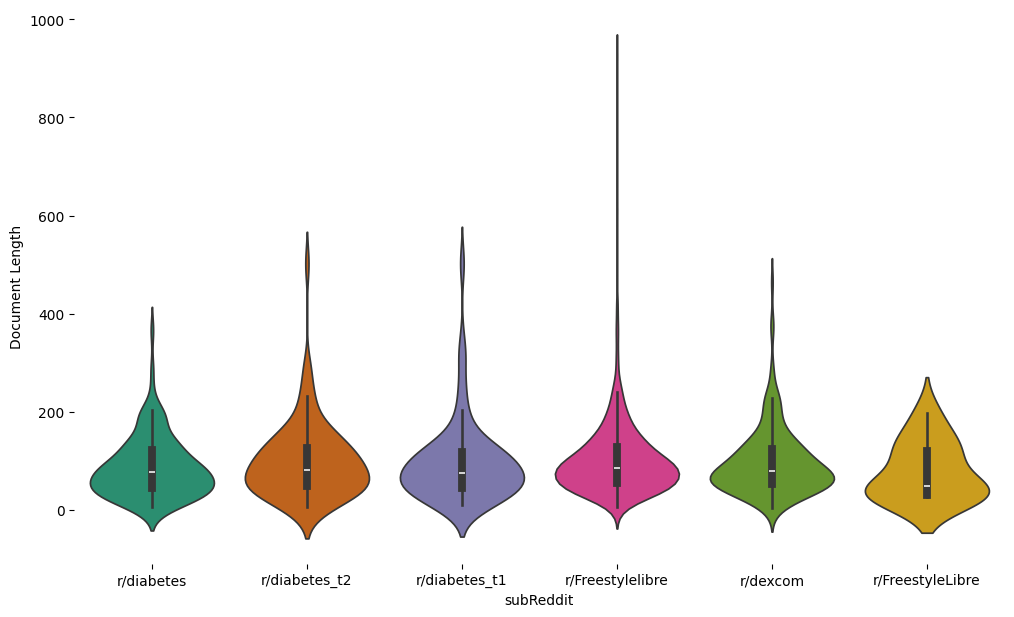

In [16]:
df['Document Length']= df['Discussion'].apply(lambda text: len(str(text).split()))
figsize = (12, 1.2 * len(df['subReddit'].unique())) #dynamic figure size based on
plt.figure(figsize=figsize)
sns.violinplot(df, x='subReddit', y='Document Length', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

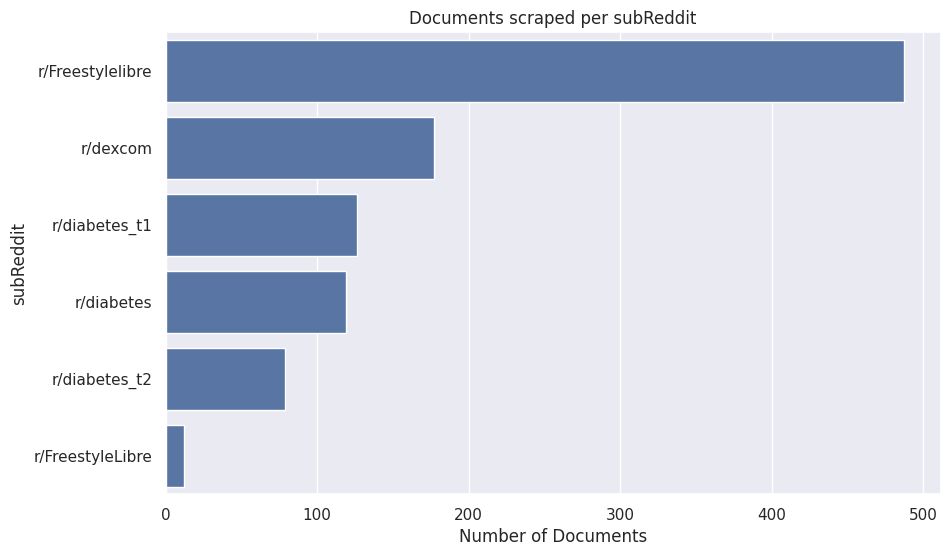

In [17]:
subReddit_counts = df['subReddit'].value_counts()

# Create a count plot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='subReddit', data=df, order = subReddit_counts.index)

# Labeling the plot
plt.title('Documents scraped per subReddit')
plt.xlabel('Number of Documents')
plt.ylabel('subReddit')

# Show the plot
plt.show()

In [ ]:
# df['Word Count']= df['Discussion'].apply(lambda text: len(str(text).split()))
# stats_df = df.groupby('subReddit')['Word Count'].agg(['mean','max', 'min']).reset_index()
# #using pandas melt function to create word count stats in a long format
# melted_stats_df = pd.melt(stats_df, id_vars='subReddit', value_vars=['mean'])
# sns.set(style="darkgrid")
# plt.figure(figsize=(10, 6))
# sns.barplot(x='value', y='subReddit', hue='variable', data=melted_stats_df)
# #titles
# plt.title('Average Word Count of Documents per subReddit')
# plt.xlabel('Average Word Count')
# plt.ylabel('subReddit')

# plt.legend()
# plt.show()

In [18]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [19]:
stopwords = set(STOPWORDS)

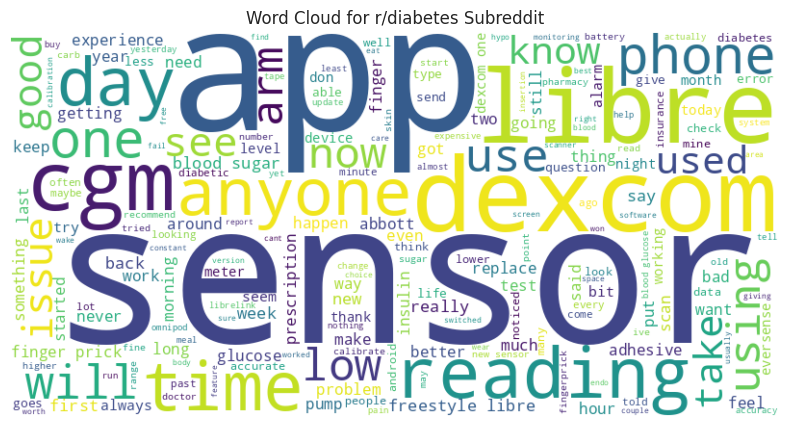

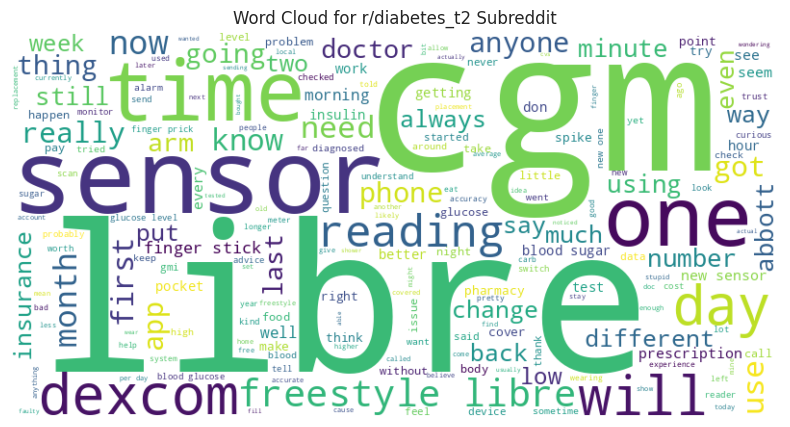

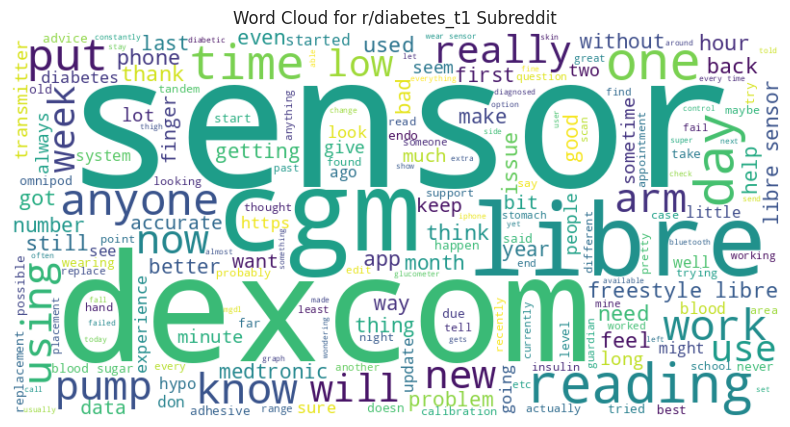

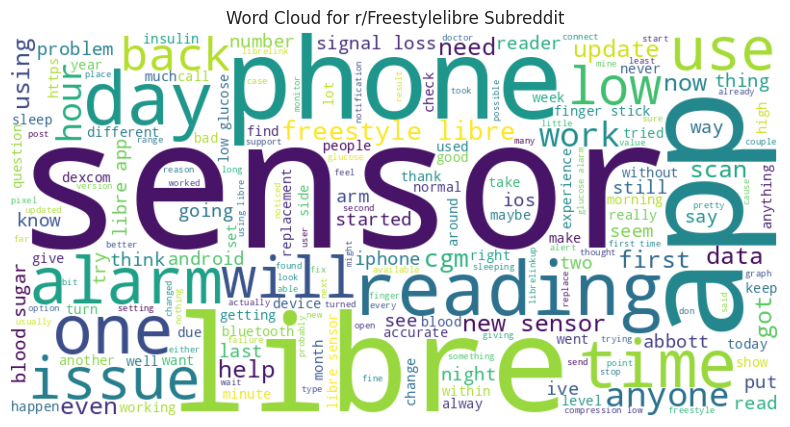

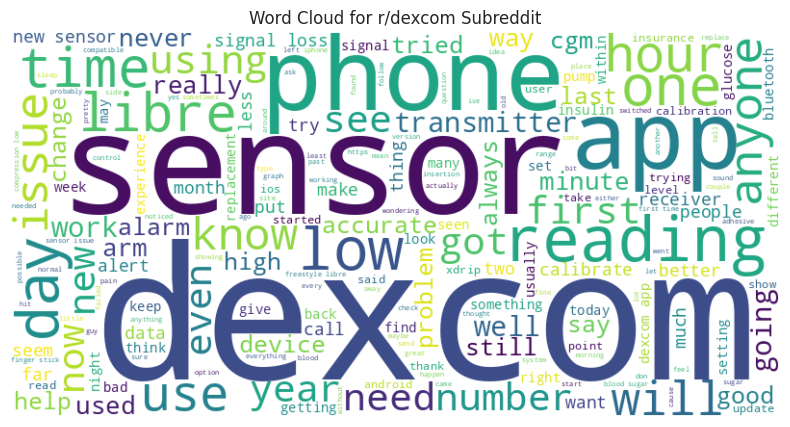

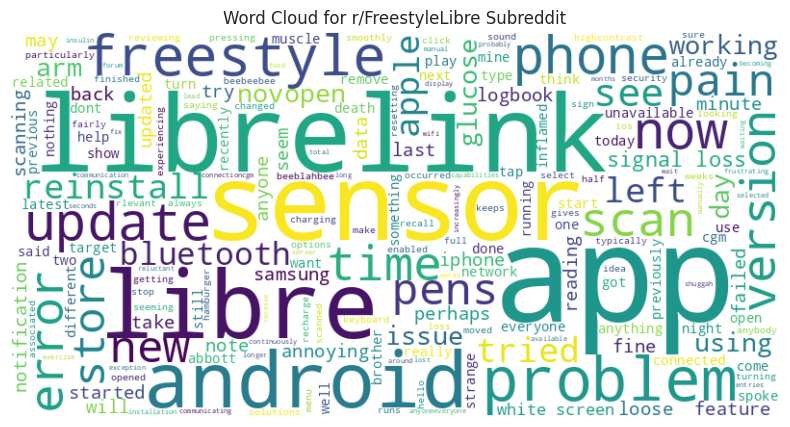

In [20]:
for subreddit in df['subReddit'].unique():
    #combining the text from each discussion record
    text = " ".join(discussion for discussion in df[df['subReddit'] == subreddit]['Discussion'])
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white', stopwords=stopwords).generate(text)

    #display the plots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {subreddit} Subreddit')
    plt.axis('off')
    plt.show()


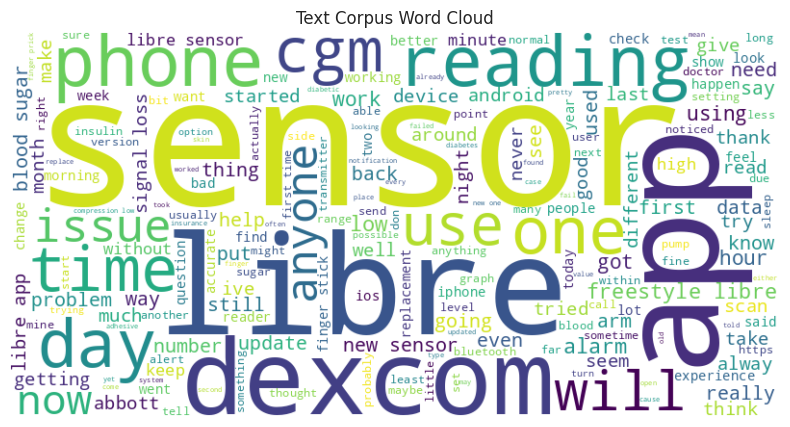

In [21]:
wordcloud_text = " ".join(discussion for discussion in df['Discussion'])
wordcloud = WordCloud(width = 800, height = 400, background_color ='white', stopwords=stopwords).generate(wordcloud_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Text Corpus Word Cloud')
plt.axis('off')
plt.show()

In [ ]:
# df.to_excel('/content/drive/MyDrive/Colab Notebooks/Stage1NLP.xlsx')